# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [154]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [155]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [156]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df[mouse_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [157]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df[mouse_df['Mouse ID'] != 'g989']
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [158]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({
    'Drug Regimen': mean_tumor.index,
    'Mean Tumor': mean_tumor,
    'Median Tumor': median_tumor,
    'Variance Tumor': variance_tumor,
    'Standard Deviation Tumor': standard_deviation_tumor,
    'SEM Tumor': sem_tumor
    
})

summary_df

,Drug Regimen,Mean Tumor,Median Tumor,Variance Tumor,Standard Deviation Tumor,SEM Tumor
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [160]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

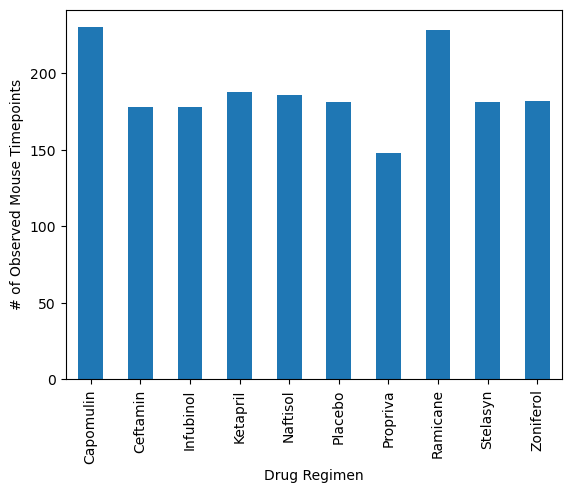

In [161]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_mouse_df.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [162]:
count_by_regimen = clean_mouse_df.groupby('Drug Regimen')['Sex'].count()

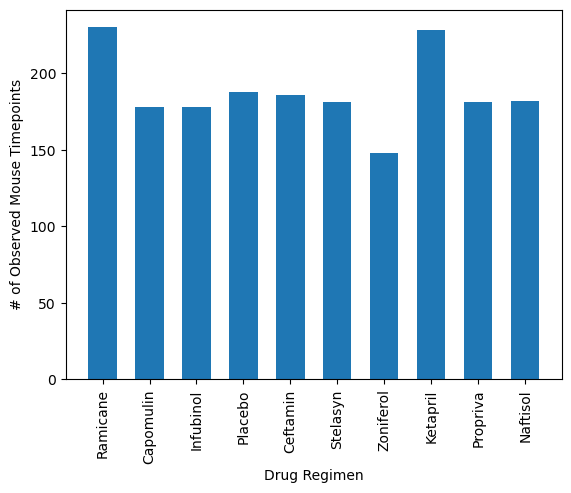

In [362]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = clean_mouse_df['Drug Regimen'].unique()
y = clean_mouse_df.groupby('Drug Regimen')['Timepoint'].count()
plt.bar(x,y,align='center', width=0.6)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

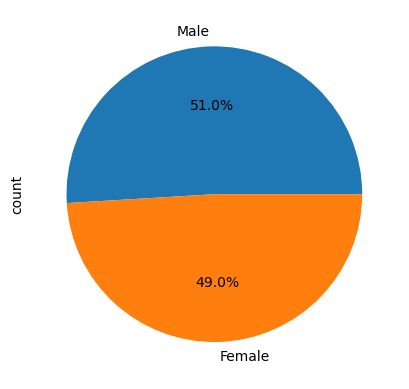

In [361]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

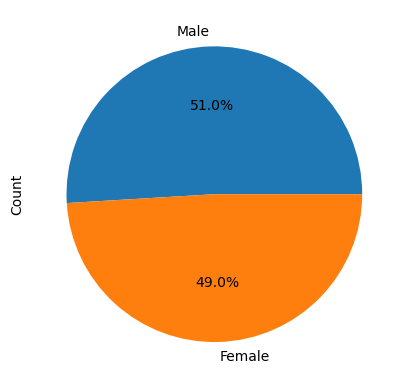

In [164]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_mouse_df['Sex'].value_counts(), labels=clean_mouse_df['Sex'].unique(), autopct='%1.1f%%')
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_timepoint = clean_mouse_df['Timepoint'].max()
final_tumor_by_regimen = clean_mouse_df[(clean_mouse_df['Timepoint'] == max_timepoint) & (clean_mouse_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']))]
final_tumor_by_regimen[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']].reset_index(drop=True)


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
58,x822,Ceftamin,61.386660
59,y163,Infubinol,67.685569
60,y769,Ceftamin,68.594745
61,y865,Ceftamin,64.729837


In [245]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = clean_mouse_df[clean_mouse_df['Drug Regimen'] == treatment]
    tumor_values = treatment_df['Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append( tumor_values )
    
    # Determine outliers using upper and lower bounds
    Q1 = tumor_values.quantile(0.25)
    Q3 = tumor_values.quantile(0.75)
    IQR = Q3 - Q1
    outliers = tumor_values[(tumor_values < (Q1 - 1.5 * IQR)) | (tumor_values > (Q3 + 1.5 * IQR))]
    print(f"{treatment} outliers: {outliers.to_list()}", end="\n\n")

Capomulin outliers: [25.47214326, 23.34359787]

Ramicane outliers: [22.05012627]

Infubinol outliers: []

Ceftamin outliers: []



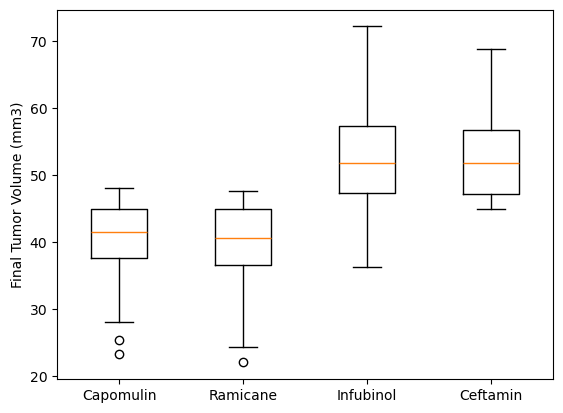

In [231]:
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

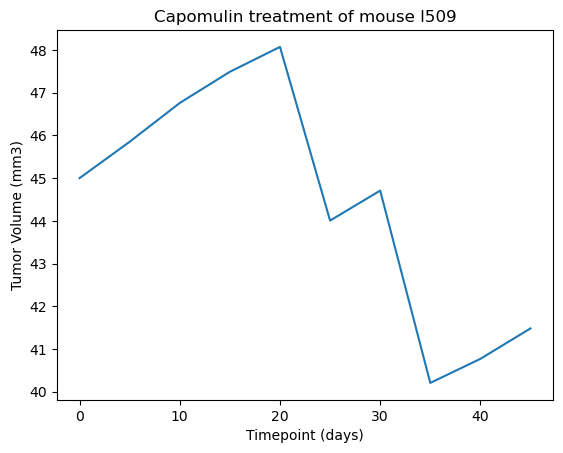

In [239]:
mouse_l509 = clean_mouse_df[(clean_mouse_df['Mouse ID'] == 'l509') & (clean_mouse_df['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

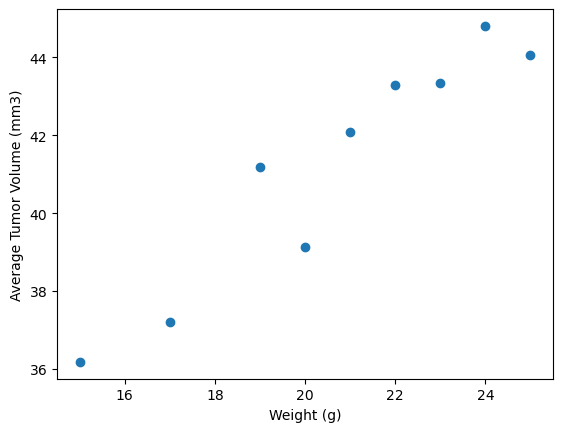

In [247]:
mean_tumor_by_weight = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin'].groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
plt.scatter(mean_tumor_by_weight.index, mean_tumor_by_weight.values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.9505243961855268


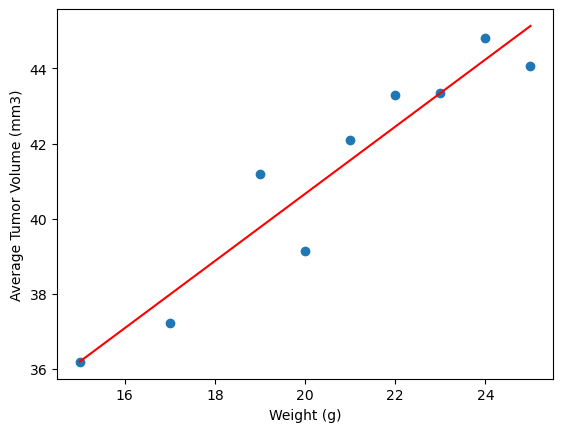

In [269]:
x = mean_tumor_by_weight.index
y = mean_tumor_by_weight.values
result = st.linregress(x, y)
corr = st.pearsonr(x, y)
print(f"The correlation between mouse weight and the average tumor volume is: {corr.statistic}")
plt.scatter(x, y)
plt.plot(x, result.slope*x + result.intercept, 'r', label='fitted line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()